<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [14]:
data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [15]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [4]:
data.head(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [5]:
print("train Нет информации по полным тратам = ", sum(data.TotalSpent == ' '))
print("test Нет информации по полным тратам = ", sum(test_data.TotalSpent == ' '))

train Нет информации по полным тратам =  9
test Нет информации по полным тратам =  2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [16]:
# Заменяю сначала пропуски нулем(других нулей в тратах нет, поэтому затем я так же буду иметь возможность дообработать)
# Затем заменяю нули на медиану 
import warnings
warnings.filterwarnings('ignore')


spent_fixer = lambda x: float(x) if x != ' ' else 0.
data.TotalSpent = data.TotalSpent.apply(spent_fixer)
data.TotalSpent[data.TotalSpent == 0.] = data.TotalSpent.median()
test_data.TotalSpent = data.TotalSpent.apply(spent_fixer)
test_data.TotalSpent[data.TotalSpent == 0.] = data.TotalSpent.median()

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

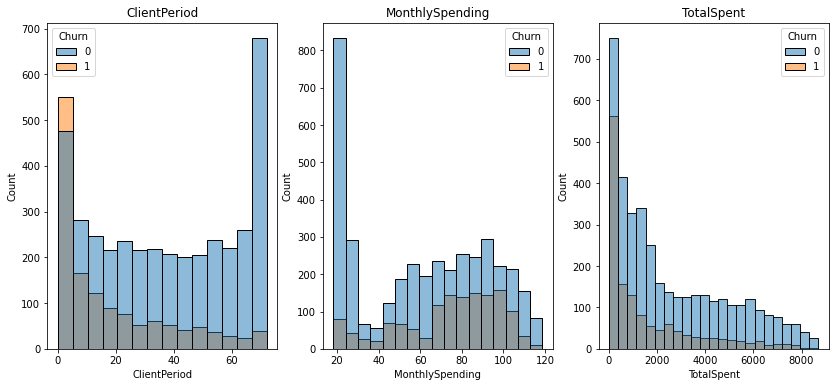

In [9]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
for idx in range(len(num_cols)):
    sns.histplot(data, x = num_cols[idx], hue='Churn', ax=ax[idx]).set_title(num_cols[idx])

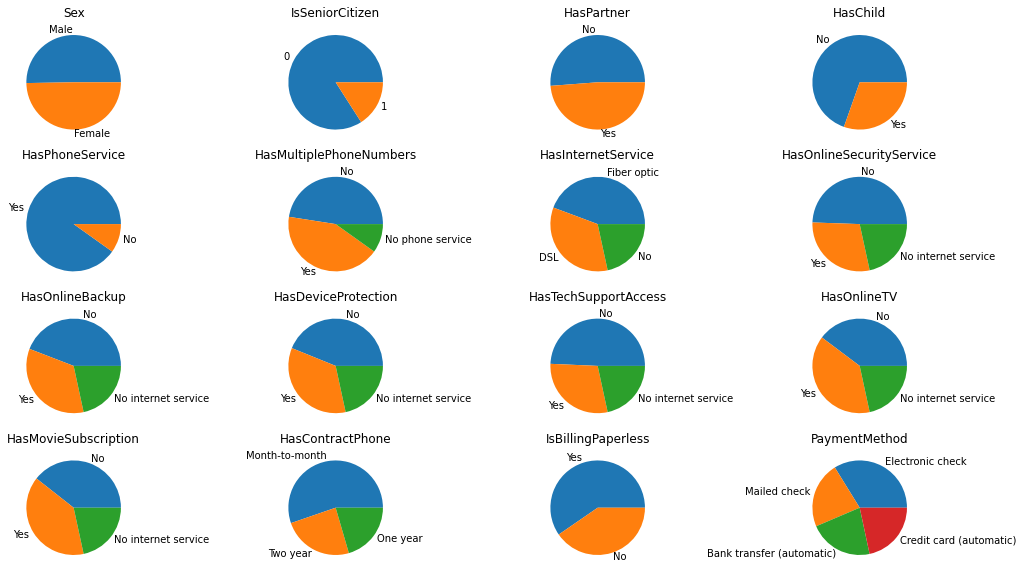

In [92]:
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 10))
for idx in range(len(cat_cols)):
    ax[idx // 4, idx % 4].pie(data[cat_cols[idx]].value_counts(), labels=data[cat_cols[idx]].value_counts().index)
    ax[idx // 4, idx % 4].set_title(cat_cols[idx])

Из гистограммы виден имбаланс классов с долями  [0.73797804 0.26202196]


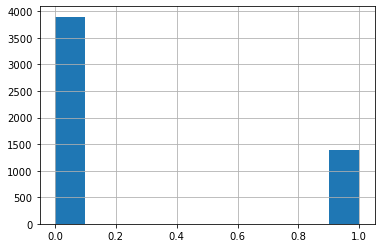

In [93]:
data['Churn'].hist()
print('Из гистограммы виден имбаланс классов с долями ', data.Churn.value_counts().values / data.Churn.shape[0])

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [10]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import ColumnTransformer

In [149]:
ct = ColumnTransformer([("proc1", make_union(OneHotEncoder(sparse=False)), cat_cols),
                        ("proc2", StandardScaler(), num_cols)])


estimator = LogisticRegression(random_state=142)
pipeline = make_pipeline(ct, estimator)
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('proc1',
                                                  FeatureUnion(transformer_list=[('onehotencoder',
                                                                                  OneHotEncoder(sparse=False))]),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasInternetService',
                                                   'HasOnlineSecurityService',
                                                   'HasOnlineBackup',
                                                   'HasDeviceProtection',
                                                   'HasTechSupportAccess',
                 

In [154]:
params = {'logisticregression__C': [1000, 100, 10, 1, 10000]}
grid = GridSearchCV(pipeline, params, scoring='roc_auc', n_jobs=-1, cv=5, verbose=1)
grid.fit(data[feature_cols], data.Churn)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.7s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('proc1',
                                                                         FeatureUnion(transformer_list=[('onehotencoder',
                                                                                                         OneHotEncoder(sparse=False))]),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                     

In [155]:
grid.best_estimator_, grid.best_score_


(Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('proc1',
                                                   FeatureUnion(transformer_list=[('onehotencoder',
                                                                                   OneHotEncoder(sparse=False))]),
                                                   ['Sex', 'IsSeniorCitizen',
                                                    'HasPartner', 'HasChild',
                                                    'HasPhoneService',
                                                    'HasMultiplePhoneNumbers',
                                                    'HasInternetService',
                                                    'HasOnlineSecurityService',
                                                    'HasOnlineBackup',
                                                    'HasDeviceProtection',
                                                    'HasTechSupportAccess',
    

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

0.845 LogisticRegression(C=1000, random_state=142)

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [19]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

train_part_x,  test_x, train_part_y, test_y = train_test_split(data[feature_cols], data.Churn, random_state=142)

In [32]:
ctb = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC', task_type='GPU',
                         random_state=142, silent=False)
ctb.fit(train_part_x, train_part_y, cat_features=cat_cols,
        eval_set=Pool(test_x, test_y, cat_features=cat_cols))


Learning rate set to 0.063345
0:	learn: 0.8151808	test: 0.8084289	best: 0.8084289 (0)	total: 61.1ms	remaining: 1m 1s
1:	learn: 0.8172828	test: 0.8119748	best: 0.8119748 (1)	total: 121ms	remaining: 1m
2:	learn: 0.8207494	test: 0.8181342	best: 0.8181342 (2)	total: 179ms	remaining: 59.5s
3:	learn: 0.8219299	test: 0.8153280	best: 0.8181342 (2)	total: 232ms	remaining: 57.7s
4:	learn: 0.8241661	test: 0.8209018	best: 0.8209018 (4)	total: 284ms	remaining: 56.5s
5:	learn: 0.8256060	test: 0.8212203	best: 0.8212203 (5)	total: 336ms	remaining: 55.7s
6:	learn: 0.8266103	test: 0.8228997	best: 0.8228997 (6)	total: 390ms	remaining: 55.3s
7:	learn: 0.8273327	test: 0.8242393	best: 0.8242393 (7)	total: 442ms	remaining: 54.8s
8:	learn: 0.8288873	test: 0.8251204	best: 0.8251204 (8)	total: 495ms	remaining: 54.5s
9:	learn: 0.8288194	test: 0.8250775	best: 0.8251204 (8)	total: 550ms	remaining: 54.4s
10:	learn: 0.8291070	test: 0.8249348	best: 0.8251204 (8)	total: 602ms	remaining: 54.2s
11:	learn: 0.8296343	test

96:	learn: 0.8647662	test: 0.8466945	best: 0.8468059 (92)	total: 5.72s	remaining: 53.3s
97:	learn: 0.8649896	test: 0.8466717	best: 0.8468059 (92)	total: 5.78s	remaining: 53.2s
98:	learn: 0.8651620	test: 0.8466660	best: 0.8468059 (92)	total: 5.84s	remaining: 53.2s
99:	learn: 0.8655444	test: 0.8471030	best: 0.8471030 (99)	total: 5.9s	remaining: 53.1s
100:	learn: 0.8656663	test: 0.8470658	best: 0.8471030 (99)	total: 5.96s	remaining: 53.1s
101:	learn: 0.8657321	test: 0.8470973	best: 0.8471030 (99)	total: 6.02s	remaining: 53s
102:	learn: 0.8657445	test: 0.8470973	best: 0.8471030 (99)	total: 6.08s	remaining: 53s
103:	learn: 0.8658076	test: 0.8470744	best: 0.8471030 (99)	total: 6.14s	remaining: 52.9s
104:	learn: 0.8658310	test: 0.8470744	best: 0.8471030 (99)	total: 6.2s	remaining: 52.9s
105:	learn: 0.8658894	test: 0.8470344	best: 0.8471030 (99)	total: 6.26s	remaining: 52.8s
106:	learn: 0.8659602	test: 0.8471744	best: 0.8471744 (106)	total: 6.32s	remaining: 52.8s
107:	learn: 0.8661867	test: 0.

189:	learn: 0.8747858	test: 0.8485768	best: 0.8485768 (189)	total: 12.4s	remaining: 52.7s
190:	learn: 0.8748973	test: 0.8486082	best: 0.8486082 (190)	total: 12.4s	remaining: 52.7s
191:	learn: 0.8748966	test: 0.8486082	best: 0.8486082 (190)	total: 12.5s	remaining: 52.6s
192:	learn: 0.8749167	test: 0.8486082	best: 0.8486082 (190)	total: 12.6s	remaining: 52.6s
193:	learn: 0.8749982	test: 0.8486367	best: 0.8486367 (193)	total: 12.7s	remaining: 52.6s
194:	learn: 0.8750683	test: 0.8486510	best: 0.8486510 (194)	total: 12.7s	remaining: 52.6s
195:	learn: 0.8751414	test: 0.8486567	best: 0.8486567 (195)	total: 12.8s	remaining: 52.7s
196:	learn: 0.8752286	test: 0.8487139	best: 0.8487139 (196)	total: 12.9s	remaining: 52.7s
197:	learn: 0.8752550	test: 0.8487139	best: 0.8487139 (196)	total: 13s	remaining: 52.7s
198:	learn: 0.8752951	test: 0.8487139	best: 0.8487139 (196)	total: 13.1s	remaining: 52.8s
199:	learn: 0.8753135	test: 0.8487053	best: 0.8487139 (196)	total: 13.2s	remaining: 52.8s
200:	learn: 

281:	learn: 0.8822988	test: 0.8484011	best: 0.8491537 (245)	total: 19.3s	remaining: 49.2s
282:	learn: 0.8824551	test: 0.8484240	best: 0.8491537 (245)	total: 19.4s	remaining: 49.2s
283:	learn: 0.8824895	test: 0.8483668	best: 0.8491537 (245)	total: 19.5s	remaining: 49.1s
284:	learn: 0.8824892	test: 0.8483697	best: 0.8491537 (245)	total: 19.6s	remaining: 49.1s
285:	learn: 0.8825587	test: 0.8483582	best: 0.8491537 (245)	total: 19.6s	remaining: 49s
286:	learn: 0.8825620	test: 0.8483582	best: 0.8491537 (245)	total: 19.7s	remaining: 49s
287:	learn: 0.8825617	test: 0.8483582	best: 0.8491537 (245)	total: 19.8s	remaining: 48.9s
288:	learn: 0.8826104	test: 0.8483582	best: 0.8491537 (245)	total: 19.9s	remaining: 48.9s
289:	learn: 0.8828453	test: 0.8484354	best: 0.8491537 (245)	total: 19.9s	remaining: 48.8s
290:	learn: 0.8828503	test: 0.8484354	best: 0.8491537 (245)	total: 20s	remaining: 48.8s
291:	learn: 0.8828549	test: 0.8484183	best: 0.8491537 (245)	total: 20.1s	remaining: 48.7s
292:	learn: 0.88

373:	learn: 0.8888428	test: 0.8478484	best: 0.8491537 (245)	total: 26.2s	remaining: 43.8s
374:	learn: 0.8888598	test: 0.8478484	best: 0.8491537 (245)	total: 26.3s	remaining: 43.8s
375:	learn: 0.8888956	test: 0.8478399	best: 0.8491537 (245)	total: 26.3s	remaining: 43.7s
376:	learn: 0.8889670	test: 0.8478570	best: 0.8491537 (245)	total: 26.4s	remaining: 43.7s
377:	learn: 0.8890024	test: 0.8478570	best: 0.8491537 (245)	total: 26.5s	remaining: 43.6s
378:	learn: 0.8891417	test: 0.8478684	best: 0.8491537 (245)	total: 26.6s	remaining: 43.5s
379:	learn: 0.8891428	test: 0.8478684	best: 0.8491537 (245)	total: 26.6s	remaining: 43.4s
380:	learn: 0.8891441	test: 0.8478684	best: 0.8491537 (245)	total: 26.7s	remaining: 43.4s
381:	learn: 0.8891407	test: 0.8478856	best: 0.8491537 (245)	total: 26.8s	remaining: 43.3s
382:	learn: 0.8892987	test: 0.8479998	best: 0.8491537 (245)	total: 26.9s	remaining: 43.3s
383:	learn: 0.8893027	test: 0.8480084	best: 0.8491537 (245)	total: 26.9s	remaining: 43.2s
384:	learn

465:	learn: 0.8935702	test: 0.8472643	best: 0.8491537 (245)	total: 32.9s	remaining: 37.7s
466:	learn: 0.8935862	test: 0.8472901	best: 0.8491537 (245)	total: 33s	remaining: 37.7s
467:	learn: 0.8935939	test: 0.8472815	best: 0.8491537 (245)	total: 33.1s	remaining: 37.6s
468:	learn: 0.8937128	test: 0.8471729	best: 0.8491537 (245)	total: 33.1s	remaining: 37.5s
469:	learn: 0.8937743	test: 0.8471244	best: 0.8491537 (245)	total: 33.2s	remaining: 37.5s
470:	learn: 0.8937819	test: 0.8471044	best: 0.8491537 (245)	total: 33.3s	remaining: 37.4s
471:	learn: 0.8939192	test: 0.8471387	best: 0.8491537 (245)	total: 33.4s	remaining: 37.4s
472:	learn: 0.8939543	test: 0.8471501	best: 0.8491537 (245)	total: 33.5s	remaining: 37.3s
473:	learn: 0.8939526	test: 0.8471501	best: 0.8491537 (245)	total: 33.5s	remaining: 37.2s
474:	learn: 0.8940755	test: 0.8471073	best: 0.8491537 (245)	total: 33.6s	remaining: 37.2s
475:	learn: 0.8941002	test: 0.8470701	best: 0.8491537 (245)	total: 33.7s	remaining: 37.1s
476:	learn: 

558:	learn: 0.8985658	test: 0.8471787	best: 0.8491537 (245)	total: 40.2s	remaining: 31.7s
559:	learn: 0.8985875	test: 0.8471758	best: 0.8491537 (245)	total: 40.2s	remaining: 31.6s
560:	learn: 0.8987969	test: 0.8471558	best: 0.8491537 (245)	total: 40.3s	remaining: 31.6s
561:	learn: 0.8987992	test: 0.8471558	best: 0.8491537 (245)	total: 40.4s	remaining: 31.5s
562:	learn: 0.8988056	test: 0.8471558	best: 0.8491537 (245)	total: 40.5s	remaining: 31.4s
563:	learn: 0.8988346	test: 0.8471473	best: 0.8491537 (245)	total: 40.6s	remaining: 31.4s
564:	learn: 0.8989582	test: 0.8471044	best: 0.8491537 (245)	total: 40.7s	remaining: 31.3s
565:	learn: 0.8990136	test: 0.8470787	best: 0.8491537 (245)	total: 40.7s	remaining: 31.2s
566:	learn: 0.8990527	test: 0.8470787	best: 0.8491537 (245)	total: 40.8s	remaining: 31.2s
567:	learn: 0.8990571	test: 0.8470787	best: 0.8491537 (245)	total: 40.9s	remaining: 31.1s
568:	learn: 0.8990577	test: 0.8470816	best: 0.8491537 (245)	total: 41s	remaining: 31s
569:	learn: 0.

652:	learn: 0.9033506	test: 0.8467588	best: 0.8491537 (245)	total: 47.6s	remaining: 25.3s
653:	learn: 0.9035543	test: 0.8469259	best: 0.8491537 (245)	total: 47.7s	remaining: 25.3s
654:	learn: 0.9037006	test: 0.8469802	best: 0.8491537 (245)	total: 47.8s	remaining: 25.2s
655:	learn: 0.9037006	test: 0.8469802	best: 0.8491537 (245)	total: 47.9s	remaining: 25.1s
656:	learn: 0.9037287	test: 0.8470002	best: 0.8491537 (245)	total: 48s	remaining: 25.1s
657:	learn: 0.9039007	test: 0.8470173	best: 0.8491537 (245)	total: 48.1s	remaining: 25s
658:	learn: 0.9038984	test: 0.8470173	best: 0.8491537 (245)	total: 48.1s	remaining: 24.9s
659:	learn: 0.9040500	test: 0.8469287	best: 0.8491537 (245)	total: 48.2s	remaining: 24.8s
660:	learn: 0.9041067	test: 0.8469373	best: 0.8491537 (245)	total: 48.3s	remaining: 24.8s
661:	learn: 0.9041218	test: 0.8469373	best: 0.8491537 (245)	total: 48.4s	remaining: 24.7s
662:	learn: 0.9041225	test: 0.8469373	best: 0.8491537 (245)	total: 48.4s	remaining: 24.6s
663:	learn: 0.

744:	learn: 0.9074310	test: 0.8476200	best: 0.8491537 (245)	total: 55.1s	remaining: 18.8s
745:	learn: 0.9075275	test: 0.8475228	best: 0.8491537 (245)	total: 55.2s	remaining: 18.8s
746:	learn: 0.9075255	test: 0.8475228	best: 0.8491537 (245)	total: 55.2s	remaining: 18.7s
747:	learn: 0.9075235	test: 0.8475228	best: 0.8491537 (245)	total: 55.3s	remaining: 18.6s
748:	learn: 0.9075469	test: 0.8476000	best: 0.8491537 (245)	total: 55.4s	remaining: 18.6s
749:	learn: 0.9075866	test: 0.8476057	best: 0.8491537 (245)	total: 55.5s	remaining: 18.5s
750:	learn: 0.9077834	test: 0.8474286	best: 0.8491537 (245)	total: 55.6s	remaining: 18.4s
751:	learn: 0.9079403	test: 0.8474857	best: 0.8491537 (245)	total: 55.7s	remaining: 18.4s
752:	learn: 0.9080122	test: 0.8474857	best: 0.8491537 (245)	total: 55.7s	remaining: 18.3s
753:	learn: 0.9080071	test: 0.8474857	best: 0.8491537 (245)	total: 55.8s	remaining: 18.2s
754:	learn: 0.9082109	test: 0.8472715	best: 0.8491537 (245)	total: 55.9s	remaining: 18.1s
755:	learn

836:	learn: 0.9116888	test: 0.8470815	best: 0.8491537 (245)	total: 1m 2s	remaining: 12.1s
837:	learn: 0.9116878	test: 0.8470930	best: 0.8491537 (245)	total: 1m 2s	remaining: 12.1s
838:	learn: 0.9117369	test: 0.8470644	best: 0.8491537 (245)	total: 1m 2s	remaining: 12s
839:	learn: 0.9117436	test: 0.8470187	best: 0.8491537 (245)	total: 1m 2s	remaining: 11.9s
840:	learn: 0.9117663	test: 0.8470273	best: 0.8491537 (245)	total: 1m 2s	remaining: 11.8s
841:	learn: 0.9119065	test: 0.8471615	best: 0.8491537 (245)	total: 1m 2s	remaining: 11.8s
842:	learn: 0.9119099	test: 0.8471415	best: 0.8491537 (245)	total: 1m 2s	remaining: 11.7s
843:	learn: 0.9120385	test: 0.8470930	best: 0.8491537 (245)	total: 1m 2s	remaining: 11.6s
844:	learn: 0.9120455	test: 0.8471015	best: 0.8491537 (245)	total: 1m 2s	remaining: 11.5s
845:	learn: 0.9120452	test: 0.8471015	best: 0.8491537 (245)	total: 1m 3s	remaining: 11.5s
846:	learn: 0.9120646	test: 0.8470987	best: 0.8491537 (245)	total: 1m 3s	remaining: 11.4s
847:	learn: 

929:	learn: 0.9148260	test: 0.8470787	best: 0.8491537 (245)	total: 1m 10s	remaining: 5.29s
930:	learn: 0.9148170	test: 0.8470815	best: 0.8491537 (245)	total: 1m 10s	remaining: 5.21s
931:	learn: 0.9148157	test: 0.8470930	best: 0.8491537 (245)	total: 1m 10s	remaining: 5.14s
932:	learn: 0.9148654	test: 0.8470873	best: 0.8491537 (245)	total: 1m 10s	remaining: 5.07s
933:	learn: 0.9148791	test: 0.8470844	best: 0.8491537 (245)	total: 1m 10s	remaining: 4.99s
934:	learn: 0.9148902	test: 0.8470815	best: 0.8491537 (245)	total: 1m 10s	remaining: 4.92s
935:	learn: 0.9148895	test: 0.8470844	best: 0.8491537 (245)	total: 1m 10s	remaining: 4.84s
936:	learn: 0.9148858	test: 0.8470901	best: 0.8491537 (245)	total: 1m 10s	remaining: 4.76s
937:	learn: 0.9148878	test: 0.8471015	best: 0.8491537 (245)	total: 1m 10s	remaining: 4.69s
938:	learn: 0.9148895	test: 0.8471215	best: 0.8491537 (245)	total: 1m 11s	remaining: 4.62s
939:	learn: 0.9148955	test: 0.8471358	best: 0.8491537 (245)	total: 1m 11s	remaining: 4.54s

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Я вам так скажу, у катбуста лучше не трогать lr и количество деревьев зачастую, можно поиграться с глубиной и количеством листов, но и дефолтные параметры пробивают максимальный балл.

Я честно попробовал запускать с кастомным lr и количеством деревьев, но пробить дефолтные параметры не вышло( 

ПАРАМЕТРЫ ДЕФОЛТНЫЕ bestTest = 0.8491537273

# Предсказания

In [20]:
best_model = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC', task_type='GPU',
                         random_state=142, silent=False)
best_model.fit(data[feature_cols], data.Churn, cat_features=cat_cols)

Learning rate set to 0.030762
0:	learn: 0.8051405	total: 106ms	remaining: 1m 45s
1:	learn: 0.8092397	total: 183ms	remaining: 1m 31s
2:	learn: 0.8187018	total: 271ms	remaining: 1m 30s
3:	learn: 0.8212318	total: 338ms	remaining: 1m 24s
4:	learn: 0.8233578	total: 406ms	remaining: 1m 20s
5:	learn: 0.8253009	total: 477ms	remaining: 1m 19s
6:	learn: 0.8251594	total: 555ms	remaining: 1m 18s
7:	learn: 0.8252840	total: 635ms	remaining: 1m 18s
8:	learn: 0.8250231	total: 712ms	remaining: 1m 18s
9:	learn: 0.8260292	total: 799ms	remaining: 1m 19s
10:	learn: 0.8262517	total: 871ms	remaining: 1m 18s
11:	learn: 0.8269669	total: 939ms	remaining: 1m 17s
12:	learn: 0.8271792	total: 1.01s	remaining: 1m 17s
13:	learn: 0.8268929	total: 1.09s	remaining: 1m 17s
14:	learn: 0.8273268	total: 1.16s	remaining: 1m 16s
15:	learn: 0.8270836	total: 1.24s	remaining: 1m 16s
16:	learn: 0.8273455	total: 1.32s	remaining: 1m 16s
17:	learn: 0.8281699	total: 1.39s	remaining: 1m 16s
18:	learn: 0.8284375	total: 1.48s	remaining:

158:	learn: 0.8608866	total: 12.8s	remaining: 1m 7s
159:	learn: 0.8609057	total: 12.8s	remaining: 1m 7s
160:	learn: 0.8609359	total: 12.9s	remaining: 1m 7s
161:	learn: 0.8609778	total: 13s	remaining: 1m 7s
162:	learn: 0.8609830	total: 13.1s	remaining: 1m 7s
163:	learn: 0.8610334	total: 13.2s	remaining: 1m 7s
164:	learn: 0.8610494	total: 13.3s	remaining: 1m 7s
165:	learn: 0.8611339	total: 13.4s	remaining: 1m 7s
166:	learn: 0.8611860	total: 13.5s	remaining: 1m 7s
167:	learn: 0.8615316	total: 13.5s	remaining: 1m 7s
168:	learn: 0.8615252	total: 13.6s	remaining: 1m 6s
169:	learn: 0.8615319	total: 13.7s	remaining: 1m 6s
170:	learn: 0.8615428	total: 13.8s	remaining: 1m 6s
171:	learn: 0.8615558	total: 13.9s	remaining: 1m 6s
172:	learn: 0.8615569	total: 14s	remaining: 1m 6s
173:	learn: 0.8615524	total: 14.1s	remaining: 1m 6s
174:	learn: 0.8615760	total: 14.1s	remaining: 1m 6s
175:	learn: 0.8616946	total: 14.2s	remaining: 1m 6s
176:	learn: 0.8617420	total: 14.3s	remaining: 1m 6s
177:	learn: 0.86

318:	learn: 0.8679628	total: 25.9s	remaining: 55.4s
319:	learn: 0.8679693	total: 26s	remaining: 55.3s
320:	learn: 0.8679695	total: 26.1s	remaining: 55.3s
321:	learn: 0.8679888	total: 26.2s	remaining: 55.2s
322:	learn: 0.8680086	total: 26.3s	remaining: 55.1s
323:	learn: 0.8680299	total: 26.4s	remaining: 55.1s
324:	learn: 0.8680247	total: 26.5s	remaining: 55s
325:	learn: 0.8680251	total: 26.6s	remaining: 54.9s
326:	learn: 0.8680342	total: 26.6s	remaining: 54.8s
327:	learn: 0.8680425	total: 26.7s	remaining: 54.8s
328:	learn: 0.8680425	total: 26.8s	remaining: 54.7s
329:	learn: 0.8680440	total: 26.9s	remaining: 54.6s
330:	learn: 0.8680442	total: 27s	remaining: 54.5s
331:	learn: 0.8680446	total: 27.1s	remaining: 54.4s
332:	learn: 0.8680527	total: 27.2s	remaining: 54.4s
333:	learn: 0.8681635	total: 27.2s	remaining: 54.3s
334:	learn: 0.8681706	total: 27.3s	remaining: 54.2s
335:	learn: 0.8682435	total: 27.4s	remaining: 54.2s
336:	learn: 0.8682633	total: 27.5s	remaining: 54.1s
337:	learn: 0.8682

477:	learn: 0.8736869	total: 39.7s	remaining: 43.3s
478:	learn: 0.8737516	total: 39.8s	remaining: 43.3s
479:	learn: 0.8737733	total: 39.9s	remaining: 43.2s
480:	learn: 0.8739043	total: 39.9s	remaining: 43.1s
481:	learn: 0.8739108	total: 40s	remaining: 43s
482:	learn: 0.8739247	total: 40.1s	remaining: 42.9s
483:	learn: 0.8740161	total: 40.2s	remaining: 42.9s
484:	learn: 0.8740367	total: 40.3s	remaining: 42.8s
485:	learn: 0.8740806	total: 40.4s	remaining: 42.7s
486:	learn: 0.8741344	total: 40.5s	remaining: 42.7s
487:	learn: 0.8741757	total: 40.6s	remaining: 42.6s
488:	learn: 0.8742180	total: 40.7s	remaining: 42.5s
489:	learn: 0.8742245	total: 40.8s	remaining: 42.4s
490:	learn: 0.8742702	total: 40.9s	remaining: 42.4s
491:	learn: 0.8743244	total: 41s	remaining: 42.3s
492:	learn: 0.8743644	total: 41s	remaining: 42.2s
493:	learn: 0.8743809	total: 41.1s	remaining: 42.1s
494:	learn: 0.8743959	total: 41.2s	remaining: 42.1s
495:	learn: 0.8744113	total: 41.3s	remaining: 42s
496:	learn: 0.8744226	

636:	learn: 0.8801697	total: 54.1s	remaining: 30.9s
637:	learn: 0.8801815	total: 54.2s	remaining: 30.8s
638:	learn: 0.8801832	total: 54.3s	remaining: 30.7s
639:	learn: 0.8801910	total: 54.4s	remaining: 30.6s
640:	learn: 0.8801914	total: 54.5s	remaining: 30.5s
641:	learn: 0.8801984	total: 54.6s	remaining: 30.4s
642:	learn: 0.8802340	total: 54.7s	remaining: 30.4s
643:	learn: 0.8803398	total: 54.8s	remaining: 30.3s
644:	learn: 0.8804307	total: 54.9s	remaining: 30.2s
645:	learn: 0.8804323	total: 55s	remaining: 30.1s
646:	learn: 0.8804739	total: 55s	remaining: 30s
647:	learn: 0.8804816	total: 55.1s	remaining: 30s
648:	learn: 0.8805294	total: 55.2s	remaining: 29.9s
649:	learn: 0.8806040	total: 55.3s	remaining: 29.8s
650:	learn: 0.8806555	total: 55.4s	remaining: 29.7s
651:	learn: 0.8806711	total: 55.5s	remaining: 29.6s
652:	learn: 0.8806748	total: 55.6s	remaining: 29.6s
653:	learn: 0.8806829	total: 55.7s	remaining: 29.5s
654:	learn: 0.8807310	total: 55.8s	remaining: 29.4s
655:	learn: 0.880728

796:	learn: 0.8836821	total: 1m 9s	remaining: 17.7s
797:	learn: 0.8837774	total: 1m 9s	remaining: 17.6s
798:	learn: 0.8837757	total: 1m 9s	remaining: 17.5s
799:	learn: 0.8838523	total: 1m 9s	remaining: 17.4s
800:	learn: 0.8838604	total: 1m 9s	remaining: 17.4s
801:	learn: 0.8838710	total: 1m 9s	remaining: 17.3s
802:	learn: 0.8838855	total: 1m 10s	remaining: 17.2s
803:	learn: 0.8839776	total: 1m 10s	remaining: 17.1s
804:	learn: 0.8840233	total: 1m 10s	remaining: 17s
805:	learn: 0.8840408	total: 1m 10s	remaining: 16.9s
806:	learn: 0.8840282	total: 1m 10s	remaining: 16.9s
807:	learn: 0.8840282	total: 1m 10s	remaining: 16.8s
808:	learn: 0.8840289	total: 1m 10s	remaining: 16.7s
809:	learn: 0.8840302	total: 1m 10s	remaining: 16.6s
810:	learn: 0.8840397	total: 1m 10s	remaining: 16.5s
811:	learn: 0.8840667	total: 1m 10s	remaining: 16.4s
812:	learn: 0.8841118	total: 1m 11s	remaining: 16.3s
813:	learn: 0.8841125	total: 1m 11s	remaining: 16.3s
814:	learn: 0.8841055	total: 1m 11s	remaining: 16.2s
8

954:	learn: 0.8853278	total: 1m 25s	remaining: 4.01s
955:	learn: 0.8853280	total: 1m 25s	remaining: 3.92s
956:	learn: 0.8853556	total: 1m 25s	remaining: 3.84s
957:	learn: 0.8853556	total: 1m 25s	remaining: 3.75s
958:	learn: 0.8853572	total: 1m 25s	remaining: 3.66s
959:	learn: 0.8853565	total: 1m 25s	remaining: 3.57s
960:	learn: 0.8853576	total: 1m 25s	remaining: 3.48s
961:	learn: 0.8853578	total: 1m 25s	remaining: 3.39s
962:	learn: 0.8853585	total: 1m 25s	remaining: 3.3s
963:	learn: 0.8853587	total: 1m 26s	remaining: 3.21s
964:	learn: 0.8853587	total: 1m 26s	remaining: 3.12s
965:	learn: 0.8853589	total: 1m 26s	remaining: 3.03s
966:	learn: 0.8853624	total: 1m 26s	remaining: 2.94s
967:	learn: 0.8853622	total: 1m 26s	remaining: 2.86s
968:	learn: 0.8853624	total: 1m 26s	remaining: 2.77s
969:	learn: 0.8853624	total: 1m 26s	remaining: 2.68s
970:	learn: 0.8853648	total: 1m 26s	remaining: 2.59s
971:	learn: 0.8853639	total: 1m 26s	remaining: 2.5s
972:	learn: 0.8853639	total: 1m 26s	remaining: 2

In [30]:
#в тесте есть пара значений которые бы по хорошему надо заменить на что-то,
#но без замены тоже пробивается нужный скор поэтому пасиба и до новых встреч:) 
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.